<a href="https://colab.research.google.com/github/JiayuShen0912/Week6-Computer-Vision-Project-Overview/blob/JiayuShen%26JackyLam/JiayuShen%26JackyLam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Jiayu Shen and Jacky Lam's Computer Vision Project <b> </h1></center>

Our computer vision project idea is **“Smart Waste Classifier and Management Model”**. We are trying to address **the problem of inadequate waste management and sorting**, which is leading to increased pollution and inefficient recycling processes worldwide. This is an important issue because inadequate waste management and sorting not only contributes to environmental degradation but also results in the loss of valuable materials that could be recycled and reused. Effective waste management is essential for sustainable development, environmental protection and public health. By improving waste separation and recycling processes, we can reduce landfill usage, reduce greenhouse gas emissions, conserve natural resources, and minimize pollution. We are working to develop a smart waste classifier based on computer vision that can automatically identify waste and classify it into predefined categories, such as accurately classifying waste into categories such as organic, recyclable and hazardous. The model we will create can be implemented in smart bins or waste collection centers to simplify the sorting process.

Our project is primarily a classification problem, where the task is to classify waste into predefined categories such as organic, recyclable, and hazardous. It is a supervised learning task since it requires labeled data for training the model to recognize and categorize waste accurately.

In [1]:
#First, link to our google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks"
!ls

/content/drive/MyDrive/Colab Notebooks
'311c4f644d9850f43eec60b52af0e49b (1).ipynb'   'JiayuShen&JackyLam (1).ipynb'
 311c4f644d9850f43eec60b52af0e49b.ipynb        'JiayuShen&JackyLam.ipynb'
'Copy of Introduction_to_Python (1).ipynb'     'Jiayu_Shen_Week 3.ipynb'
'Copy of Introduction_to_Python (2).ipynb'     'Jiayu Shen_Week4.ipynb'
'Copy of Introduction_to_Python.ipynb'	        runs
'Copy of Week_2_Data_Preprocessing (1).ipynb'  'waste dataset'
'Copy of Week_2_Data_Preprocessing.ipynb'       yolov8n-cls.pt
'Jiayu Shen_Assignment2.ipynb'		        yolov8n.pt


# 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


if CLI the format should be:

    yolo TASK MODE ARGS

  Where:

    TASK (optional) is one of (detect, segment, classify, pose)


    MODE (required) is one of (train, val, predict, export, track)


    ARGS (optional) are arg=value pairs like imgsz=640 that override defaults.


Default ARG values are defined on this page from the cfg/defaults.yaml file.



In [ ]:
# Run inference on an image with YOLOv8n

# Detection:
#!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'
#!yolo predict model=yolov8n.pt source='https://www.thoughtco.com/thmb/Hw83C2QW8dWeDUt7R4pYyPke3HI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-547031277-58ef97803df78cd3fc724e24.jpg' save=True
#!yolo predict model=yolov8n.pt source=0

# Segmentation:
#!yolo segment predict  model=yolov8s-seg.pt source='https://ultralytics.com/images/zidane.jpg'

#pose detection:
!yolo classify predict  model=yolov8s-cls.pt source='https://ultralytics.com/images/zidane.jpg'


#add arguments of "save and show"

100% 12.2M/12.2M [00:00<00:00, 124MB/s]
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 6356200 parameters, 0 gradients, 13.5 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
100% 755k/755k [00:00<00:00, 17.2MB/s]
image 1/1 /content/zidane.jpg: 224x224 suit 0.47, groom 0.08, rugby_ball 0.07, bow_tie 0.05, bulletproof_vest 0.05, 4.6ms
Speed: 49.0ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


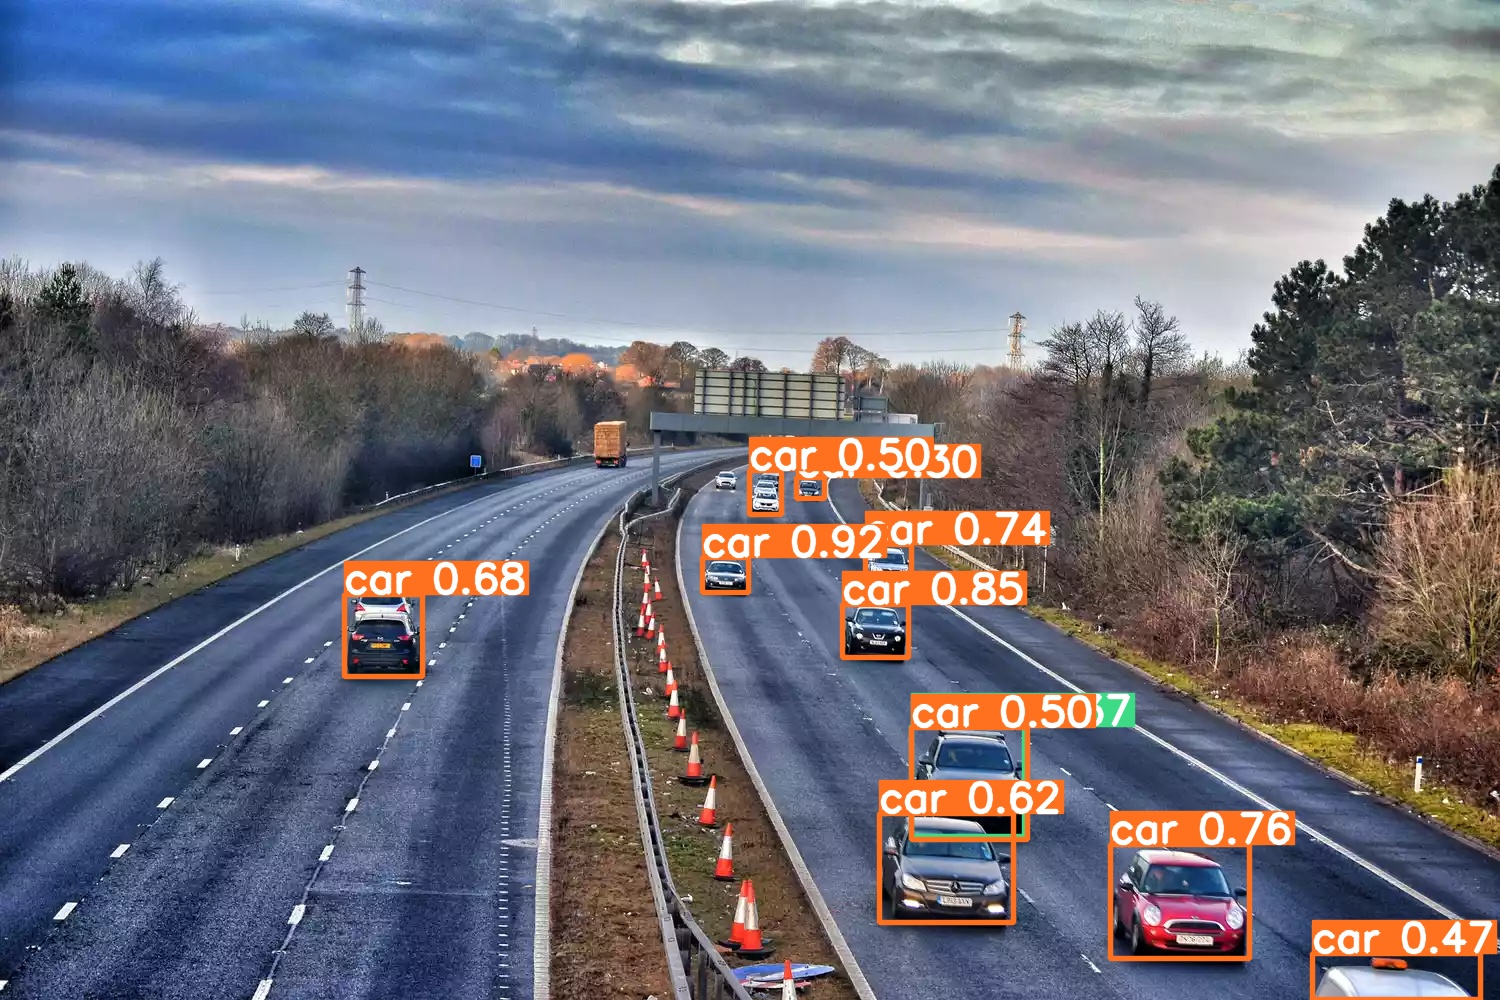

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict3/GettyImages-547031277-58ef97803df78cd3fc724e24.jpg')


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/212889447-69e5bdf1-5800-4e29-835e-2ed2336dede2.jpg" width="600">

you can also use functions of ultralytics intead of CLI commands.


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


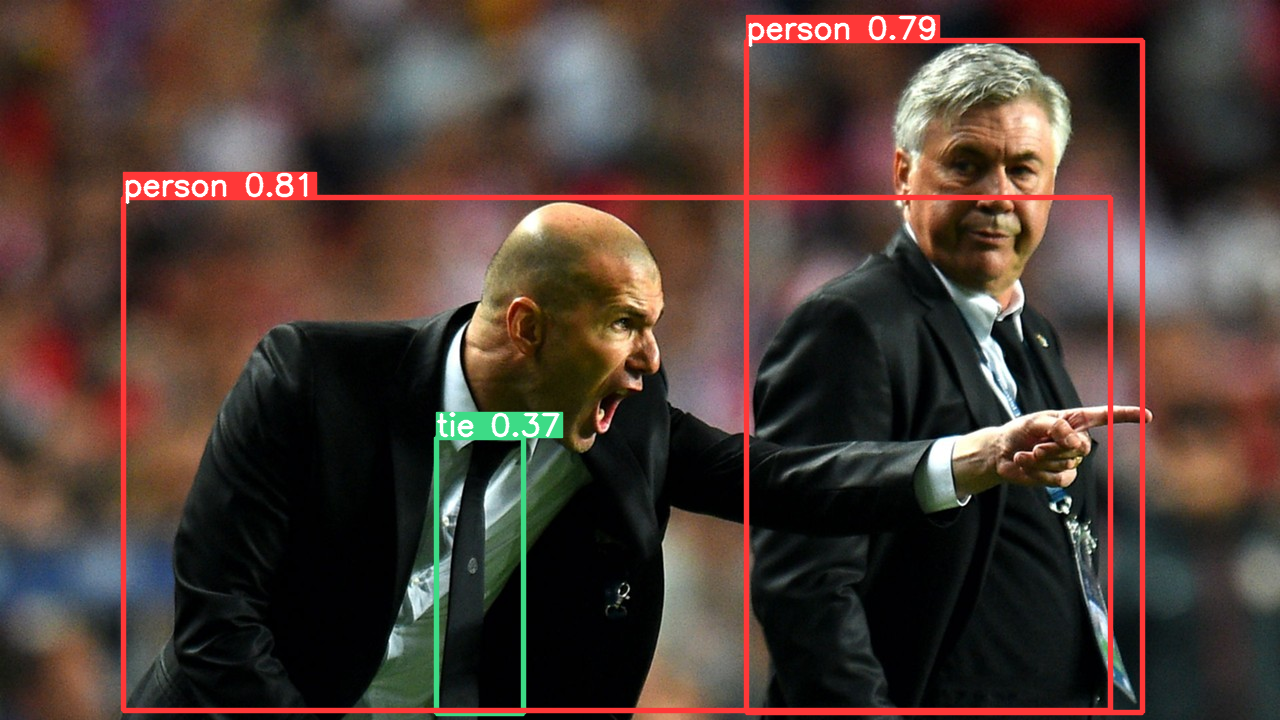

In [ ]:
%matplotlib inline
from PIL import Image

from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Run inference on 'bus.jpg'
results = model('https://ultralytics.com/images/zidane.jpg')  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image


#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)

#show saved image
#Image.open('results.jpg')

# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLOv8 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLOv8 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:03<00:00, 253MB/s]


In [ ]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 12.5MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 4669.05file/s]
Dataset download success ✅ (0.9s), saved to /content/datasets

val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 472.37it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.68s/it]
                   all          4         17      0.621      0.833      0.888       0.63
                person          4         10      0.721        0.5      0.519      0.269
                   dog          4     

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLOv8 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .


In YOLO (You Only Look Once), a YAML file is used for configuration and setup. It specifies parameters such as paths to datasets, model architecture, training hyperparameters, and class names. The YAML file is essential for defining how the YOLO model should be trained and what it should detect, making it an integral part of customizing the YOLO model for specific object detection tasks.

In code below, coco8.yaml is used:



    # Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
    path: ../datasets/coco8  # dataset root dir
    train: images/train  # train images (relative to 'path') 4 images
    val: images/val  # val images (relative to 'path') 4 images
    test:  # test images (optional)

    # Classes
    names:
      0: person
      1: bicycle
      2: car
      3: motorcycle
      4: airplane
      5: bus
      6: train
      7: truck
      8: boat
      9: traffic light
      10: fire hydrant
      11: stop sign
      12: parking meter
      13: bench
      14: bird
      15: cat
      16: dog
      17: horse
      18: sheep
      19: cow
      20: elephant
      21: bear
      22: zebra
      23: giraffe
      24: backpack
      25: umbrella
      26: handbag
      27: tie
      28: suitcase
      29: frisbee
      30: skis
      31: snowboard
      32: sports ball
      33: kite
      34: baseball bat
      35: baseball glove
      36: skateboard
      37: surfboard
      38: tennis racket
      39: bottle
      40: wine glass
      41: cup
      42: fork
      43: knife
      44: spoon
      45: bowl
      46: banana
      47: apple
      48: sandwich
      49: orange
      50: broccoli
      51: carrot
      52: hot dog
      53: pizza
      54: donut
      55: cake
      56: chair
      57: couch
      58: potted plant
      59: bed
      60: dining table
      61: toilet
      62: tv
      63: laptop
      64: mouse
      65: remote
      66: keyboard
      67: cell phone
      68: microwave
      69: oven
      70: toaster
      71: sink
      72: refrigerator
      73: book
      74: clock
      75: vase
      76: scissors
      77: teddy bear
      78: hair drier
      79: toothbrush


    # Download script/URL (optional)
    download: https://ultralytics.com/assets/coco8.zip

In [ ]:
# Train YOLOv8n on COCO8 for 3 epochs
#!yolo train model=yolov8n.pt data=coco8.yaml epochs=3 imgsz=640

!yolo train model=yolov8n.pt data=coco8-seg.yaml epochs=3 imgsz=640



100% 6.23M/6.23M [00:00<00:00, 144MB/s]
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8-seg.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

# 5. Python Usage

YOLOv8 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLOv8 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLOv8 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco128.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

# 6. Tasks

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco128.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

## 3. Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [4]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

In [6]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='/content/drive/MyDrive/Colab Notebooks/waste dataset', epochs=5)  # train the model


Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/waste dataset, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /content/drive/MyDrive/Colab Notebooks/waste dataset/train... 40 images, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/waste dataset/train/organic waste/organic_waste_4.jpeg: corrupt JPEG restored and saved



val: Scanning /content/drive/MyDrive/Colab Notebooks/waste dataset/val... 20 images, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train5
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.41it/s]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.70it/s]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all        0.4          1



5 epochs completed in 0.006 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train5/weights/best.pt, 3.0MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/waste dataset/train... found 40 images in 3 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/waste dataset/val... found 20 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.30it/s]


                   all        0.4          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5
Results saved to runs/classify/train5


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb3b41246d0>
curves: []
curves_results: []
fitness: 0.7000000029802322
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.4000000059604645, 'metrics/accuracy_top5': 1.0, 'fitness': 0.7000000029802322}
save_dir: PosixPath('runs/classify/train5')
speed: {'preprocess': 0.06705522537231445, 'inference': 0.2760648727416992, 'loss': 0.0006794929504394531, 'postprocess': 0.0006556510925292969}
task: 'classify'
top1: 0.4000000059604645
top5: 1.0

In [ ]:
model= YOLO("/content/drive/MyDrive/Colab Notebooks/runs/classify/train2/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

In [ ]:
results=model('https://miro.medium.com/v2/resize:fit:510/format:webp/1*jW-Q9DvmB-zvM4hgJlBx3g.png', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities


## 4. Pose

YOLOv8 _pose_ models use the `-pose` suffix, i.e. `yolov8n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

In [ ]:
# Load YOLOv8n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n classification model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image